# 4 Preprocessing and Training

## 4.1 Imports and Set Display

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [9]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

In [10]:
import re
import warnings
warnings.filterwarnings("ignore")

In [11]:
import time

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 4.2 Load Datasets
the dataset RealEstData08102023.csv can be download from wake county real estate website:    
https://drive.google.com/file/d/1vKKLN9_c78hS_KNOp5kTE7-7hS8359Zs/view?usp=drive_link

In [13]:
# load datasets
house = pd.read_csv('house_Nov02_2023.csv', index_col=0)
house.head()

,owner1,owner2,mailing_address1,mailing_address2,real_estate_id,planning_jurisdiction,township,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,effective_year,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate
0,BONES 13 LLC,NaN,306 MIDENHALL WAY,CARY NC 27513-5569,3,RA,LEESVILLE,NaN,IX-3,2.00,740000,524503.0,392040.0,0778.03 40 5654 000,CORPORATION,LO7 OLD SOUTH DEVELOPMENT CORP,C,14675,2635,GWRA001,J W BURRESS,1979.0,0,8508.0,ALL,1984.0,1.0,A,C,0,O,G,0,A,10,2.5,0,NaN,29.61,110.0,47,0,0,0,A,NaN,SERVICE GARAGE,RALEIGH,27617.0,6012 TRIANGLE DR A,NaN,2012.0,2012.0,NaN,3,3,13.261294,CARY,1111.136263,7.3
1,6421 WESTGATE REALTY LLC,NaN,PO BOX 90667,RALEIGH NC 27675-0667,43396,RA,LEESVILLE,NaN,IX-3,2.54,1650000,5013736.0,886242.0,0768.04 92 9999 000,CORPORATION,PROP OF WILLIAMS INVESTMENT CORPORATION,C,14716,1642,GWRA001,WESTGATE JEEP SALES & SERVICE,1965.0,0,27778.0,ALL,2015.0,1.0,A,C,0,B,A,0,A,0,2.5,0,NaN,29.71,130.0,99,0,0,0,A,NaN,SALES & SERVICE,RALEIGH,27617.0,6408 OLD WESTGATE RD,NaN,2012.0,2012.0,NaN,4,4,13.261294,CARY,1111.136263,7.3
2,ASH GREY PROPERTIES LLC,NaN,5805 LEASE LN,RALEIGH NC 27617-4708,45910,RA,LEESVILLE,NaN,IX-3,0.97,105000,80884.0,171125.0,0777.02 69 6704 000,CORPORATION,LO7 ASH GREY PROPERTIES LLC BM2013-01575,R,14744,1699,GWRA001,GWRA001,1959.0,1,616.0,E,1985.0,1.0,A,C,0,A,A,0,A,0,1.0,0,NaN,D-10,75.0,76,0,0,1,A,NaN,ONE FAMILY,RALEIGH,27617.0,8401 EBENEZER CHURCH RD,NaN,2012.0,2012.0,NaN,4,4,13.261294,CARY,1111.136263,7.3
3,CAP2 REALTY LLC,NaN,7201 SPARHAWK RD,WAKE FOREST NC 27587-4529,47829,RA,LEESVILLE,NaN,IX-3,2.90,975000,1187520.0,409290.0,0768.02 86 1192 000,CORPORATION,LO1 6508 MT HERMAN RD BM2015-00579,C,19002,217,GWRA001,ECGS,2005.0,0,20700.0,ALL,2010.0,1.0,A,C,0,O,A,64,A,64,2.5,0,NaN,29.55,100.0,91,0,0,0,A,NaN,SERVICE GARAGE,RALEIGH,27617.0,6508 MT HERMAN RD,NaN,2012.0,2022.0,NaN,5,4,13.261294,CARY,1111.136263,7.3
4,A&A OF NC INC,NaN,5917 TRIANGLE DR,RALEIGH NC 27617-4742,65238,RA,LEESVILLE,NaN,IX-3,0.95,330000,300764.0,186219.0,0778.04 50 5768 000,CORPORATION,LO17 PROP OLD SOUTH DEV CORP,D,15046,2414,GWRA001,A & A OF N.C./DBA DIAMOND TOUCH CONSTRUC,1972.0,0,4000.0,WSE,2000.0,1.0,A,C,0,O,A,54,A,54,2.5,0,NaN,41.61,110.0,75,0,0,0,A,NaN,PHARM PLANT,RALEIGH,27617.0,5917 TRIANGLE DR,NaN,2012.0,2012.0,NaN,12,12,13.261294,CARY,1111.136263,7.3


In [14]:
house.shape

(339382, 60)

In [15]:
house.dtypes

owner1                             object
owner2                             object
mailing_address1                   object
mailing_address2                   object
real_estate_id                      int64
planning_jurisdiction              object
township                           object
land_sale_price                   float64
zoning                             object
deeded_acreage                    float64
total_sale_price                    int64
assessed_building_value           float64
assessed_land_value               float64
parcel_identification              object
billing_class                      object
property_description               object
land_classification                object
deed_book                           int64
deed_page                           int64
vcs                                object
property_index                     object
year_built                        float64
units                               int64
heated_area                       

## 4.3 Check Zero Values

In [16]:
zero_value_columns = ['units', 'foundation_basement_percent', 
                      'heat_percent', 'air_percent', 'bath_fixtures', 'accrued_assessed_condition_pct', 
                      'land_deferred_amount', 'historic_deferred_amount', 'recycled_units']

for column in zero_value_columns:
    print(f"In column {column}. there are {house[house[column]==0].shape[0]/house.shape[0]*100}% have value 0")

In column units. there are 4.020543222681226% have value 0
In column foundation_basement_percent. there are 86.79246394917821% have value 0
In column heat_percent. there are 99.84324448556494% have value 0
In column air_percent. there are 99.54593938393904% have value 0
In column bath_fixtures. there are 93.4834493284853% have value 0
In column accrued_assessed_condition_pct. there are 1.700443747753269% have value 0
In column land_deferred_amount. there are 99.90836284776447% have value 0
In column historic_deferred_amount. there are 99.91572917833003% have value 0
In column recycled_units. there are 4.677914562351568% have value 0


## 4.4 Check Missing Values in Continuous Variables.

In [17]:
house.select_dtypes(['int', 'float']).isna().sum()

real_estate_id                         0
land_sale_price                   202784
deeded_acreage                     15932
total_sale_price                       0
assessed_building_value             3903
assessed_land_value                16353
deed_book                              0
deed_page                              0
year_built                          4545
units                                  0
heated_area                         5763
effective_year                      4548
story_height                        5764
foundation_basement_percent            0
heat_percent                           0
air_percent                            0
bath                                5796
bath_fixtures                          0
assessed_grade_difference           5755
accrued_assessed_condition_pct         0
land_deferred_amount                   0
historic_deferred_amount               0
recycled_units                         0
physical_zip_code                      0
land_sale_year  

for land_sale_price, deeded_acreage, assessed_building_value, assessed_land_value, heated_area, assessed_grade_difference, use same total_sale_year data in same city to fillna.

In [18]:
house['land_sale_price'] = house.groupby(['physical_city', 'total_sale_year'])['land_sale_price'].transform(lambda x:x.fillna((x.median())))
house['deeded_acreage'] = house.groupby(['physical_city', 'total_sale_year'])['deeded_acreage'].transform(lambda x:x.fillna((x.median())))
house['assessed_building_value'] = house.groupby(['physical_city', 'total_sale_year'])['assessed_building_value'].transform(lambda x:x.fillna((x.median())))
house['assessed_land_value'] = house.groupby(['physical_city', 'total_sale_year'])['assessed_land_value'].transform(lambda x:x.fillna((x.median())))
house['heated_area'] = house.groupby(['physical_city', 'total_sale_year'])['heated_area'].transform(lambda x:x.fillna((x.median())))
house['story_height'] = house.groupby(['physical_city', 'total_sale_year'])['story_height'].transform(lambda x:x.fillna((x.median())))
house['bath'] = house.groupby(['physical_city', 'total_sale_year'])['bath'].transform(lambda x:x.fillna((x.median())))
house['assessed_grade_difference'] = house.groupby(['physical_city', 'total_sale_year'])['assessed_grade_difference'].transform(lambda x:x.fillna((x.median())))

In [19]:
# use total_sale_year replace nan in year_built
house.loc[house['year_built'].isna(), 'year_built'] = house.loc[house['year_built'].isna(), 'total_sale_year']
# use year_built replace nan in effective_year
house.loc[house['effective_year'].isna(), 'effective_year'] = house.loc[house['effective_year'].isna(), 'year_built']
# use year_built replace nan in deed_year
house.loc[house['deed_year'].isna(), 'deed_year'] = house.loc[house['deed_year'].isna(), 'year_built']
# use total_sale_year replace nan in land_sale_year
house.loc[house['land_sale_year'].isna(), 'land_sale_year'] = house.loc[house['land_sale_year'].isna(), 'total_sale_year']
# use total_sale_month replace nan in land_sale_month
house.loc[house['land_sale_month'].isna(), 'land_sale_month'] = house.loc[house['land_sale_month'].isna(), 'total_sale_month']

In [20]:
house.select_dtypes(['int', 'float']).isna().sum()

real_estate_id                      0
land_sale_price                   621
deeded_acreage                      0
total_sale_price                    0
assessed_building_value            33
assessed_land_value                 0
deed_book                           0
deed_page                           0
year_built                          0
units                               0
heated_area                        41
effective_year                      0
story_height                       41
foundation_basement_percent         0
heat_percent                        0
air_percent                         0
bath                               41
bath_fixtures                       0
assessed_grade_difference          41
accrued_assessed_condition_pct      0
land_deferred_amount                0
historic_deferred_amount            0
recycled_units                      0
physical_zip_code                   0
land_sale_year                      0
total_sale_year                     0
deed_year   

after same city, same year fillna, still have nan in land_sale_price, assessed_building_value, heated_area, assessed_grade_difference and deed_year, fillna with median of whole column.

In [21]:
house['land_sale_price'] = house['land_sale_price'].fillna(house['land_sale_price'].median())
house['assessed_building_value'] = house['assessed_building_value'].fillna(house['assessed_building_value'].median())
house['heated_area'] = house['heated_area'].fillna(house['heated_area'].median())
house['story_height'] = house['story_height'].fillna(house['story_height'].median())
house['bath'] = house['bath'].fillna(house['bath'].median())
house['assessed_grade_difference'] = house['assessed_grade_difference'].fillna(house['assessed_grade_difference'].median())
house.shape

(339382, 60)

In [22]:
house['age_sale'] = house['total_sale_year'] - house['year_built']
house['age_assess'] = 2020 - house['year_built']
house.shape

(339382, 62)

## 4.5 Check Variables

<font color=red> Check statistics description to get lists of continuous variables and categorical variables quickly.

In [23]:
des = house.describe(include='all')
des

,owner1,owner2,mailing_address1,mailing_address2,real_estate_id,planning_jurisdiction,township,land_sale_price,zoning,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,parcel_identification,billing_class,property_description,land_classification,deed_book,deed_page,vcs,property_index,year_built,units,heated_area,utilities,effective_year,story_height,design_style,foundation_basement,foundation_basement_percent,exterior_wall,heat,heat_percent,air,air_percent,bath,bath_fixtures,built_in1_description,grade,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,disq_and_qual_flag,land_disq_and_qual_flag,type_and_use,physical_city,physical_zip_code,physical_location,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess
count,339382,68938,339382,339380,339382.000000,339382,339382,3.393820e+05,339375,339382.000000,3.393820e+05,3.393820e+05,3.393820e+05,339382,339382,339352,339374,339382.000000,339382.000000,339382,338189,339382.000000,339382.000000,339382.000000,336986,339382.000000,339382.000000,333588,339382,339382.000000,333616,333600,339382.000000,333619,339382.000000,339382.000000,339382.000000,263220,334838,339382.000000,339382.000000,3.393820e+05,3.393820e+05,339382.000000,339149,133125,334627,339382,339382.000000,339382,339382.000000,339382.000000,339382.000000,339382.000000,339382.000000,339382.000000,339382.000000,339382,339382.000000,339382.000000,339382.000000,339382.000000
unique,307280,65379,294106,73138,NaN,15,20,NaN,310,NaN,NaN,NaN,NaN,339376,6,336939,23,NaN,NaN,5060,13019,NaN,NaN,NaN,15,NaN,NaN,15,3,NaN,26,7,NaN,3,NaN,NaN,NaN,21,274,NaN,NaN,NaN,NaN,NaN,19,18,93,19,NaN,339175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN
top,AC BLACKWOLF RUN OWNER LLC,BEAUTIFUL DREAMER APARTMENTS INC,PO BOX 4090,SCOTTSDALE AZ 85261-4090,NaN,RA,WHITE OAK,NaN,R-4,NaN,NaN,NaN,NaN,0785.12 85 1079 004,INDIVIDUALS,LO1,R,NaN,NaN,01RA512,01RA512,NaN,NaN,NaN,ALL,NaN,NaN,A,C,NaN,A,A,NaN,A,NaN,NaN,NaN,One Fireplace,B,NaN,NaN,NaN,NaN,NaN,A,A,ONE FAMILY,RALEIGH,NaN,129 N MAIN ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RALEIGH,NaN,NaN,NaN,NaN
freq,329,21,1683,1683,NaN,130979,36136,NaN,42116,NaN,NaN,NaN,NaN,2,308904,124,311107,NaN,NaN,903,903,NaN,NaN,NaN,251142,NaN,NaN,245888,294558,NaN,168584,330855,NaN,328487,NaN,NaN,NaN,249980,36501,NaN,NaN,NaN,NaN,NaN,311551,81872,319124,154491,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82983,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,254950.157572,NaN,NaN,6.069816e+04,NaN,0.515620,3.953196e+05,3.203430e+05,1.117390e+05,NaN,NaN,NaN,NaN,15197.625272,1326.260450,NaN,NaN,1996.468286,1.153756,2895.684534,NaN,1999.835884,1.610320,NaN,NaN,10.831617,NaN,NaN,0.085429,NaN,0.179258,2.561308,0.526127,NaN,NaN,119.292682,81.104237,5.531802e+02,4.755161e+02,1.220604,NaN,NaN,NaN,NaN,27571.875256,NaN,2008.452549,2011.625351,2013.337941,6.579948,6.629600,6.646849,5.943799,NaN,1087.881155,4.442849,15.157065,23.531714
std,NaN,NaN,NaN,NaN,137710.153963,NaN,NaN,2.318232e+05,NaN,2.415861,1.885120e+06,1.427200e+06,3.534716e+05,NaN,NaN,NaN,NaN,4044.169270,816.673119,NaN,NaN,19.769498,7.505076,10673.393216,NaN,14.914489,0.460252,NaN,NaN,29.404170,NaN,NaN,2.356661,NaN,3.092351,0.595487,2.695570,NaN,NaN,21.899198,16.793507,3.110791e+04,4.302053e+04,7.832012,NaN,NaN,NaN,NaN,41.615929,NaN,10.825172,10.317608,9.235272,3.353210,3.282843,3.289257,3.649853,NaN,284.792880,1.538215,18.757852,19.769498
min,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,1.900000e+02,NaN,0.010000,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1790.000000,0.000000,192.000000,NaN,1840.000000,1.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,NaN,NaN,27501.000000,NaN,1974.000000,1974.000000,1953.000000,1.000000,1.000000,1.000000,0.449741,NaN,306.877319,1.400000,-48.0000

<font color=red>Here, we use null mean as criterion, the other method is using percentage of number of unique. 

In [24]:
print(f"This dataset have {house.shape[1]} variables in total")
print(f"This dataset have {len(list(des.columns[des.T['mean'].notna()]))} variables as continuous variables")
print(f"This dataset have {len(list(set(house.columns) - set(list(des.columns[des.T['mean'].notna()]))))} variables as categorical variables")

This dataset have 62 variables in total
This dataset have 35 variables as continuous variables
This dataset have 27 variables as categorical variables


## 4.6 Define Useful Functions.

In [25]:
def cross_validate(data, estimator, test_p, n=5):
    train_r2 = []
    test_r2 = []
    train_mae = []
    test_mae = []
    train_rmse = []
    test_rmse = []
    train_length = int(np.floor(len(data)*(1-test_p)))
    res_train = pd.DataFrame(index=range(train_length))
    res_test = pd.DataFrame(index=range(len(data)-train_length))
    
    # check if all continuous
    if np.all(data.dtypes.values) in ['int64', 'float64']:
        for i in range(n):
            shuffled = data.sample(len(data))
            X = shuffled.drop('total_sale_price', axis=1)
            y = shuffled['total_sale_price']
            X_train, X_test, y_train, y_test = X.iloc[:train_length], X.iloc[train_length:], y.iloc[:train_length], y.iloc[train_length:]
            #scale
            scaler = StandardScaler()
            scaler.fit(X_train)
            X_train_final = scaler.transform(X_train)
            X_test_final = scaler.transform(X_test)
            
            est = estimator.fit(X_train_final, y_train)
            y_train_pred = est.predict(X_train_final)
            y_test_pred = est.predict(X_test_final)
            
            res_train['y_train_true_'+str(i+1)] = y_train.values
            res_train['y_train_predict_'+str(i+1)] = y_train_pred
            res_test['y_test_true_'+str(i+1)] = y_test.values
            res_test['y_test_predict_'+str(i+1)] = y_test_pred

            train_r2.append(r2_score(y_train, y_train_pred))
            test_r2.append(r2_score(y_test, y_test_pred))
            train_mae.append(mean_absolute_error(y_train, y_train_pred))
            test_mae.append(mean_absolute_error(y_test, y_test_pred))
            train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    elif np.all(data.dtypes.values) in ['int64', 'float64', 'category']:               
        for i in range(n):
            shuffled = data.sample(len(data))
            X = shuffled.drop('total_sale_price', axis=1)
            y = shuffled['total_sale_price']
            X_train, X_test, y_train, y_test = X.iloc[:train_length], X.iloc[train_length:], y.iloc[:train_length], y.iloc[train_length:]
            # separate continuous and categorical
            X_train_num = X_train.select_dtypes(['int64', 'float64'])
            X_test_num = X_test.select_dtypes(['int64', 'float64'])
            X_train_cat = X_train.select_dtypes(['category'])
            X_test_cat = X_test.select_dtypes(['category'])
            # only scale continuous
            scaler = StandardScaler()
            scaler.fit(X_train_num)
            X_train_num.iloc[:,:] = scaler.transform(X_train_num)
            X_test_num.iloc[:,:] = scaler.transform(X_test_num)
             # vectorize
            count_vec = CountVectorizer(max_features=100)
            index_train = X_train_cat.index
            index_test = X_test_cat.index
            X_train_cat = pd.DataFrame(count_vec.fit_transform(X_train_cat['property_description']).toarray(), index=index_train,\
                          columns=count_vec.get_feature_names_out())
            X_test_cat = pd.DataFrame(count_vec.transform(X_test_cat['property_description']).toarray(), index=index_test,\
                         columns=count_vec.get_feature_names_out())
            # combine back
            X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
            X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)

            est = estimator.fit(X_train_final, y_train)
            y_train_pred = est.predict(X_train_final)
            y_test_pred = est.predict(X_test_final)
        
            res_train['y_train_true_'+str(i+1)] = y_train.values
            res_train['y_train_predict_'+str(i+1)] = y_train_pred
            res_test['y_test_true_'+str(i+1)] = y_test.values
            res_test['y_test_predict_'+str(i+1)] = y_test_pred

            train_r2.append(r2_score(y_train, y_train_pred))
            test_r2.append(r2_score(y_test, y_test_pred))
            train_mae.append(mean_absolute_error(y_train, y_train_pred))
            test_mae.append(mean_absolute_error(y_test, y_test_pred))
            train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    else:
        for i in range(n):
            shuffled = data.sample(len(data))
            X = shuffled.drop('total_sale_price', axis=1)
            y = shuffled['total_sale_price']
            X_train, X_test, y_train, y_test = X.iloc[:train_length], X.iloc[train_length:], y.iloc[:train_length], y.iloc[train_length:]
            # separate 
            X_train_num = X_train.select_dtypes(['int64', 'float64'])
            X_test_num = X_test.select_dtypes(['int64', 'float64'])
            X_train_cat = X_train.select_dtypes(['category'])
            X_test_cat = X_test.select_dtypes(['category'])
            X_train_bool = X_train.select_dtypes(['bool'])
            X_test_bool = X_test.select_dtypes(['bool'])
            # scale
            scaler = StandardScaler()
            scaler.fit(X_train_num)
            X_train_num.iloc[:,:] = scaler.transform(X_train_num)
            X_test_num.iloc[:,:] = scaler.transform(X_test_num)
            # vectorize
            count_vec = CountVectorizer(max_features=100)
            index_train = X_train_cat.index
            index_test = X_test_cat.index
            X_train_cat = pd.DataFrame(count_vec.fit_transform(X_train_cat['property_description']).toarray(), index=index_train,\
                          columns=count_vec.get_feature_names_out())
            X_test_cat = pd.DataFrame(count_vec.transform(X_test_cat['property_description']).toarray(), index=index_test,\
                         columns=count_vec.get_feature_names_out())
            # combine
            X_train_final = pd.concat([X_train_num, X_train_cat, X_train_bool], axis=1)
            X_test_final = pd.concat([X_test_num, X_test_cat, X_test_bool], axis=1)

            est = estimator.fit(X_train_final, y_train)
            y_train_pred = est.predict(X_train_final)
            y_test_pred = est.predict(X_test_final)
        
            res_train['y_train_true_'+str(i+1)] = y_train.values
            res_train['y_train_predict_'+str(i+1)] = y_train_pred
            res_test['y_test_true_'+str(i+1)] = y_test.values
            res_test['y_test_predict_'+str(i+1)] = y_test_pred

            train_r2.append(r2_score(y_train, y_train_pred))
            test_r2.append(r2_score(y_test, y_test_pred))
            train_mae.append(mean_absolute_error(y_train, y_train_pred))
            test_mae.append(mean_absolute_error(y_test, y_test_pred))
            train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
            test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
            
    res_metrics = pd.DataFrame(index=range(n), data={'train_r2':train_r2, 'test_r2':test_r2,
                            'train_mae':train_mae, 'test_mae':test_mae,
                            'train_rmse':train_rmse, 'test_rmse':test_rmse})
    return res_train, res_test, res_metrics

In [26]:
def scatterplots(data, columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.scatterplot(x = col, y = 'total_sale_price', data=data, alpha=0.5, ax=ax)
        ax.set(xlabel=col, ylabel='total_sale_price')
    nsubplots = nrow * ncol
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)    #  set not visible about empty axes.

In [27]:
def residual_plot(y_train, y_train_pred, y_test, y_test_pred, figsize=(15, 10)):

    fig, ax = plt.subplots(3, 2, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.2, hspace=0.4)

    ax[0,0].scatter(y_train, y_train_pred)
    ax[0,0].plot([0, 0.75*10**6], [0, 0.75*10**6], color='red')
    ax[0,0].set_xlabel('y train true')
    ax[0,0].set_ylabel('y train predict')

    ax[0,1].scatter(y_test, y_test_pred)
    ax[0,1].plot([0, 0.75*10**6], [0, 0.75*10**6], color='red')
    ax[0,1].set_xlabel('y test true')
    ax[0,1].set_ylabel('y test predict')

    residuals_train = y_train.values - y_train_pred
    sns.kdeplot(residuals_train, fill=True, ax=ax[1,0])
    ax[1,0].set_xlabel('Residuals')

    sm.qqplot(residuals_train, ax=ax[1,1])
    ax[1,1].set_title("QQ Plot of Residuals")

    sns.scatterplot(x=y_train_pred, y=residuals_train, ax=ax[2,0])
    ax[2,0].plot([0,0.75*10**6],[0,0], color='red')


## 4.7 Exp_1 Use All Continuous Variables

### 4.7.1 Setup Dataframe

In [28]:
df_1 = house.copy()
df_1 = df_1.select_dtypes(['int', 'float'])

In [29]:
df_1.head()

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess
0,3,40000.0,2.00,740000,524503.0,392040.0,14675,2635,1979.0,0,8508.0,1984.0,1.0,0,0,10,2.5,0,110.0,47,0,0,0,27617.0,2012.0,2012.0,2012.0,3.0,3,3,13.261294,1111.136263,7.3,33.0,41.0
1,43396,40000.0,2.54,1650000,5013736.0,886242.0,14716,1642,1965.0,0,27778.0,2015.0,1.0,0,0,0,2.5,0,130.0,99,0,0,0,27617.0,2012.0,2012.0,2012.0,4.0,4,4,13.261294,1111.136263,7.3,47.0,55.0
2,45910,40000.0,0.97,105000,80884.0,171125.0,14744,1699,1959.0,1,616.0,1985.0,1.0,0,0,0,1.0,0,75.0,76,0,0,1,27617.0,2012.0,2012.0,2012.0,4.0,4,4,13.261294,1111.136263,7.3,53.0,61.0
3,47829,40000.0,2.90,975000,1187520.0,409290.0,19002,217,2005.0,0,20700.0,2010.0,1.0,0,64,64,2.5,0,100.0,91,0,0,0,27617.0,2012.0,2012.0,2022.0,5.0,5,4,13.261294,1111.136263,7.3,7.0,15.0
4,65238,40000.0,0.95,330000,300764.0,186219.0,15046,2414,1972.0,0,4000.0,2000.0,1.0,0,54,54,2.5,0,110.0,75,0,0,0,27617.0,2012.0,2012.0,2012.0,12.0,12,12,13.261294,1111.136263,7.3,40.0,48.0


### 4.7.2 Modelling

In [30]:
X = df_1.drop('total_sale_price', axis=1)
y = df_1['total_sale_price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [32]:
X_train.shape, X_test.shape

((322412, 34), (16970, 34))

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
lr_1 = LinearRegression().fit(X_train_scaled, y_train)

In [35]:
y_train_pred = lr_1.predict(X_train_scaled)
y_test_pred = lr_1.predict(X_test_scaled)

In [36]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.7596751146858839 0.7649882882517834
MAE 113142.98950626324 117889.0265061038
RMSE 920546.0917497551 978925.6511512826


In [37]:
estimator = LinearRegression()

In [38]:
res_train_1, res_test_1, res_metrics_1 = cross_validate(df_1, estimator, test_p=0.05, n=20)

In [39]:
res_metrics_1

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.753485,0.842777,113257.150519,117148.737377,926592.976491,8.776153e+05
1,0.756574,0.830635,113469.203209,110583.063187,932030.032828,7.442577e+05
2,0.759170,0.775465,113104.793471,115319.219744,926330.817861,8.705798e+05
3,0.759836,0.767232,114200.570535,105874.850075,936246.536119,6.338814e+05
4,0.760177,0.753832,113083.240876,122104.493463,919513.354335,1.003163e+06
5,0.758864,0.777020,112651.943658,121974.656517,922507.726828,9.465565e+05
6,0.755352,0.862762,113402.161562,110800.939877,935680.342327,6.501343e+05
7,0.757365,0.813417,112774.793711,113619.831441,929877.562656,7.921940e+05
8,0.757202,0.852288,114170.886034,105043.170447,938890.147023,5.557466e+05
9,0.758514,0.787710,112770.310815,114685.213333,926851.378015,8.599221e+05


### 4.7.3 Hyperparameter Table

In [40]:
hyperparameter_table = pd.read_excel('hyperparameters_table.xlsx', index_col=0)
hyperparameter_table = hyperparameter_table.to_dict()
hyperparameter_table

{'Model_Name': {1: 'Linear Regression'},
 'Exp': {1: 1},
 'Dropna_Thres%': {1: nan},
 'Drop_Dupe': {1: nan},
 'Only_Residential': {1: nan},
 'n_Num': {1: nan},
 'n_Cat': {1: nan},
 'Cat_Encode': {1: nan},
 'Test_P%': {1: nan},
 'Scale': {1: nan},
 'Cross_Val': {1: nan},
 'N_Shuffle': {1: nan},
 'Train_RMSE_mean': {1: nan},
 'Train_RMSE_std': {1: nan},
 'Test_RMSE_mean': {1: nan},
 'Test_RMSE_std': {1: nan}}

In [41]:
param_names = list(hyperparameter_table.keys())
param_values = ['Linear Regression', 1, 95, 'Yes', 'No', X_train.shape[1], 0, np.nan, 5, 'Yes', 'Yes', 20,
                res_metrics_1['train_rmse'].mean(), res_metrics_1['train_rmse'].std(), 
                res_metrics_1['test_rmse'].mean(), res_metrics_1['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][1] = value
    
hyperparameter_table

{'Model_Name': {1: 'Linear Regression'},
 'Exp': {1: 1},
 'Dropna_Thres%': {1: 95},
 'Drop_Dupe': {1: 'Yes'},
 'Only_Residential': {1: 'No'},
 'n_Num': {1: 34},
 'n_Cat': {1: 0},
 'Cat_Encode': {1: nan},
 'Test_P%': {1: 5},
 'Scale': {1: 'Yes'},
 'Cross_Val': {1: 'Yes'},
 'N_Shuffle': {1: 20},
 'Train_RMSE_mean': {1: 912390.1516300837},
 'Train_RMSE_std': {1: 37873.79078621348},
 'Test_RMSE_mean': {1: 1071677.7694231854},
 'Test_RMSE_std': {1: 620781.9625227619}}

<font color=red> from the 20 tests result of Exp_1, we found the model is not very stable, because it have negative R2, which means in that test, the model performs worse than a simple horizontal line (a model that predicts the mean of the dependent variable for all observations). possible reasons are 1) random nature of the data splitting during cross-validation; 2) the data has inherent variability, certain splits might result in less representative training and test sets, 3) outliers or extreme values in the data may have a disproportionate impact on the model's performance in certain splits. let's check the histogram of whole dataset.

### 4.7.4 Outliers Analysis

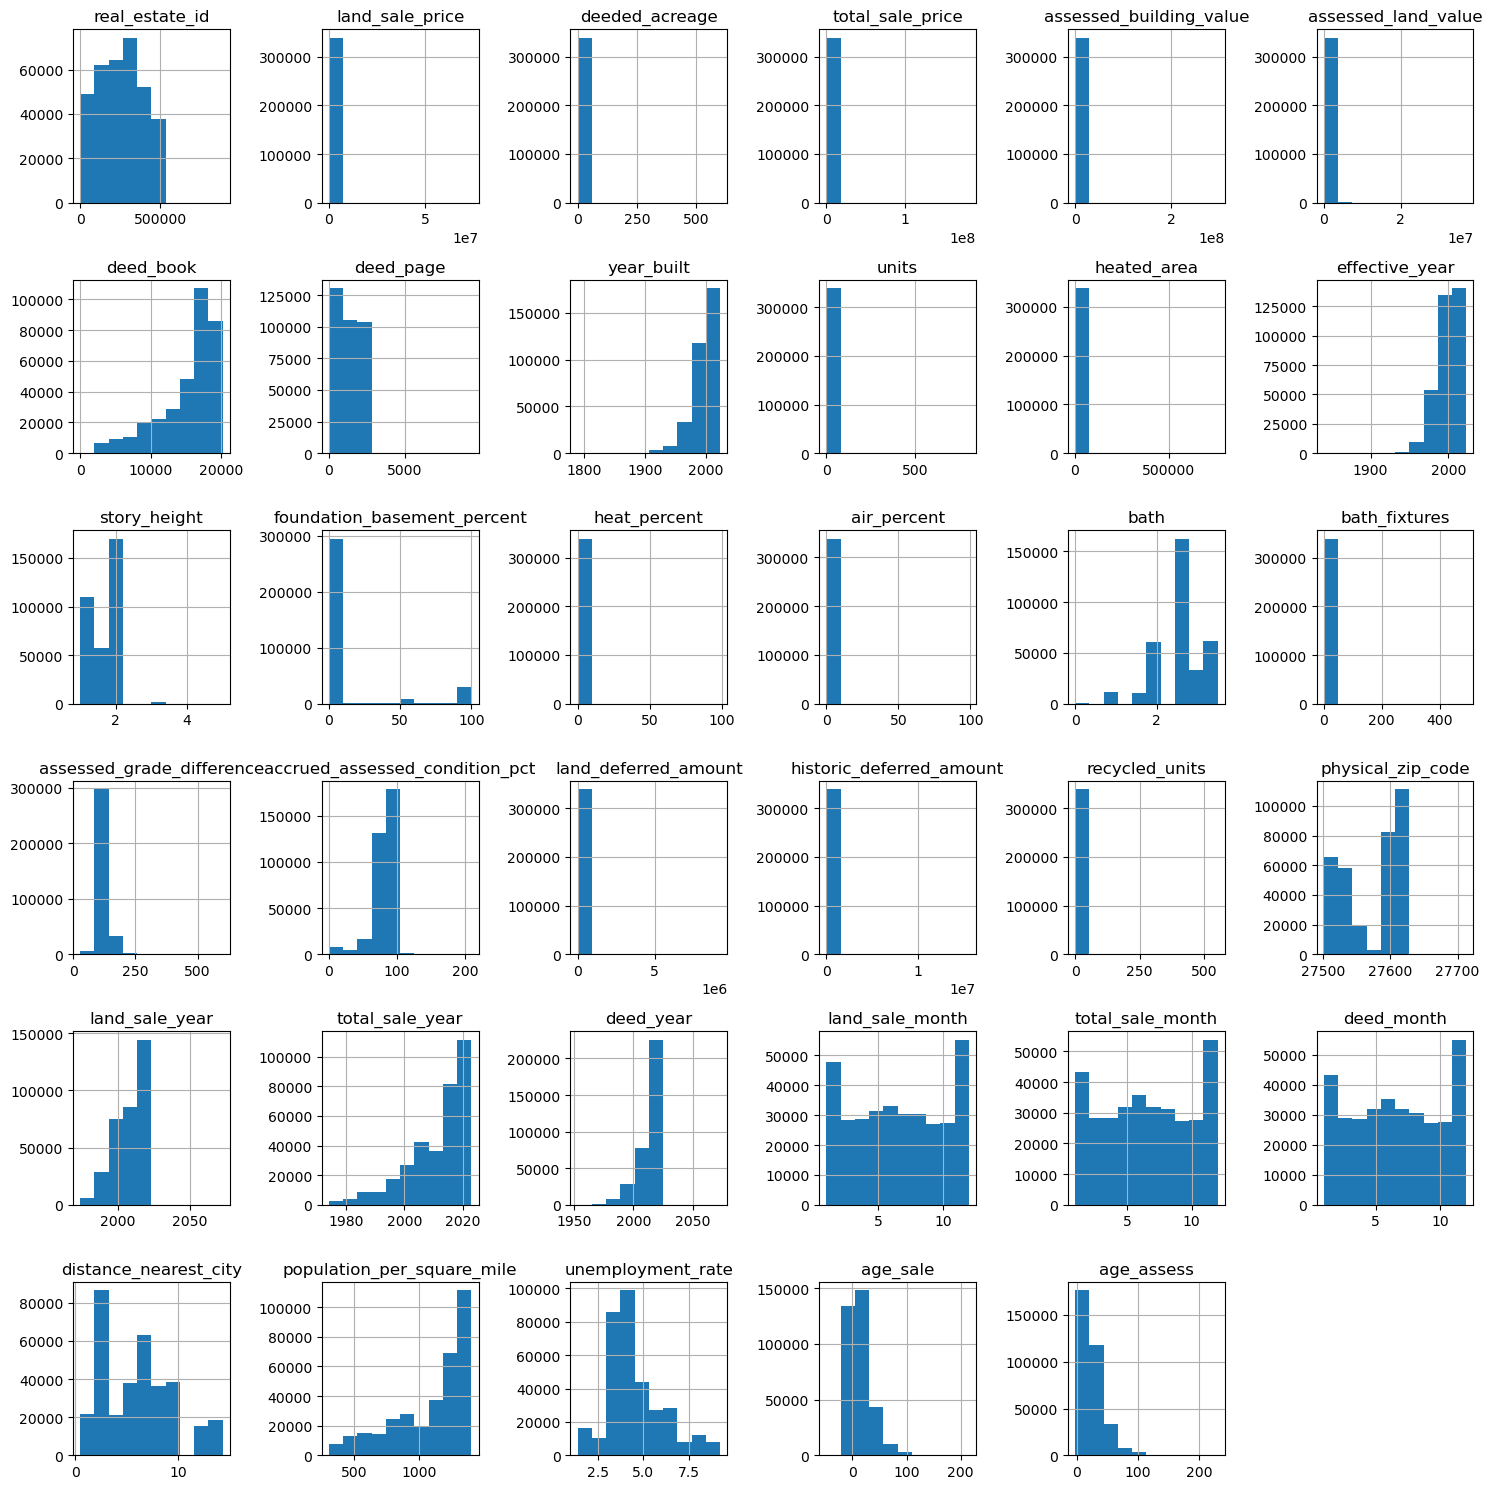

In [42]:
df_1.hist(figsize=(15,15))
plt.tight_layout();

<font color=red>land_sale_price, deeded_acreage, total_sale_price, assessed_building_value, assessed_land_value, units, heated_area, foundation_basement_percent, heat_percent, air_percent, bath_fixtures, land_deferred_amount, historic_deferred_amount and recycled_units are very skewed, means they have outliers or some extreme values, which confirms the result from cross validation. The simplest way is to remove these outliers. but maybe we can try something different, **since the target of this project is focus on the residential houses in Cary, only select the residential houses can be helpful.**

## 4.8 Reload Dataset and Select Only Residential Houses in Cary

In [43]:
# Reload datasets
house = pd.read_csv('house_Nov02_2023.csv', index_col=0)
house = house[(house['type_and_use']=='ONE FAMILY')|(house['type_and_use']=='TWO FAMILY')|(house['type_and_use']=='THREE FAMILY')|\
(house['type_and_use']=='FOUR FAMILY')|(house['type_and_use']=='MULTI-FAMILY')]

In [44]:
house.select_dtypes(['int', 'float']).isna().sum()

real_estate_id                         0
land_sale_price                   189587
deeded_acreage                     11944
total_sale_price                       0
assessed_building_value               64
assessed_land_value                12037
deed_book                              0
deed_page                              0
year_built                             0
units                                  0
heated_area                         1217
effective_year                         4
story_height                        1217
foundation_basement_percent            0
heat_percent                           0
air_percent                            0
bath                                1232
bath_fixtures                          0
assessed_grade_difference           1209
accrued_assessed_condition_pct         0
land_deferred_amount                   0
historic_deferred_amount               0
recycled_units                         0
physical_zip_code                      0
land_sale_year  

In [45]:
house['land_sale_price'] = house.groupby(['physical_city', 'total_sale_year'])['land_sale_price'].transform(lambda x:x.fillna((x.median())))
house['deeded_acreage'] = house.groupby(['physical_city', 'total_sale_year'])['deeded_acreage'].transform(lambda x:x.fillna((x.median())))
house['assessed_building_value'] = house.groupby(['physical_city', 'total_sale_year'])['assessed_building_value'].transform(lambda x:x.fillna((x.median())))
house['assessed_land_value'] = house.groupby(['physical_city', 'total_sale_year'])['assessed_land_value'].transform(lambda x:x.fillna((x.median())))
house['heated_area'] = house.groupby(['physical_city', 'total_sale_year'])['heated_area'].transform(lambda x:x.fillna((x.median())))
house['story_height'] = house['story_height'].fillna(house['story_height'].median())
house['bath'] = house['bath'].fillna(house['bath'].median())
house['assessed_grade_difference'] = house.groupby(['physical_city', 'total_sale_year'])['assessed_grade_difference'].transform(lambda x:x.fillna((x.median())))

In [46]:
# use year_built replace nan in effective_year
house.loc[house['effective_year'].isna(), 'effective_year'] = house.loc[house['effective_year'].isna(), 'year_built']
# use year_built replace nan in deed_year
house.loc[house['deed_year'].isna(), 'deed_year'] = house.loc[house['deed_year'].isna(), 'year_built']
# use total_sale_year replace nan in land_sale_year
house.loc[house['land_sale_year'].isna(), 'land_sale_year'] = house.loc[house['land_sale_year'].isna(), 'total_sale_year']
# use total_sale_month replace nan in land_sale_month
house.loc[house['land_sale_month'].isna(), 'land_sale_month'] = house.loc[house['land_sale_month'].isna(), 'total_sale_month']

In [47]:
house['age_sale'] = house['total_sale_year'] - house['year_built']
house['age_assess'] = 2020 - house['year_built']
house.shape

(321696, 62)

In [48]:
house.select_dtypes(['int', 'float']).isna().sum()

real_estate_id                       0
land_sale_price                   1689
deeded_acreage                       0
total_sale_price                     0
assessed_building_value              0
assessed_land_value                  0
deed_book                            0
deed_page                            0
year_built                           0
units                                0
heated_area                          0
effective_year                       0
story_height                         0
foundation_basement_percent          0
heat_percent                         0
air_percent                          0
bath                                 0
bath_fixtures                        0
assessed_grade_difference            0
accrued_assessed_condition_pct       0
land_deferred_amount                 0
historic_deferred_amount             0
recycled_units                       0
physical_zip_code                    0
land_sale_year                       0
total_sale_year          

In [49]:
house['land_sale_price'] = house['land_sale_price'].fillna(house['land_sale_price'].median())
house.shape

(321696, 62)

## 4.9 Exp_2 Use All Continuous Variables on Residential Houses Dataset

### 4.9.1 Setup Dataframe

In [50]:
df_2 = house.copy()
df_2 = df_2.select_dtypes(['int', 'float'])

In [51]:
df_2.head()

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess
2,45910,39900.0,0.97,105000,80884.0,171125.0,14744,1699,1959.0,1,616.0,1985.0,1.0,0,0,0,1.0,0,75.0,76,0,0,1,27617.0,2012.0,2012.0,2012.0,4.0,4,4,13.261294,1111.136263,7.3,53.0,61.0
8,161510,39900.0,0.26,176000,193802.0,75000.0,14665,1363,1992.0,1,1792.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,2012.0,2012.0,2012.0,2.0,2,2,13.261294,1111.136263,7.3,20.0,28.0
9,161520,20000.0,0.26,233000,204016.0,75000.0,14631,1929,1992.0,1,1954.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,1992.0,2012.0,2012.0,1.0,1,1,13.261294,1111.136263,7.3,20.0,28.0
10,161625,17000.0,0.27,220000,203248.0,75000.0,14717,1335,1993.0,1,2004.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1992.0,2012.0,2012.0,11.0,4,4,13.261294,1111.136263,7.3,19.0,27.0
11,161637,14500.0,0.24,190000,157202.0,75000.0,14887,419,1993.0,1,1560.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1993.0,2012.0,2012.0,3.0,8,8,13.261294,1111.136263,7.3,19.0,27.0


### 4.9.2 Modelling

In [52]:
X = df_2.drop('total_sale_price', axis=1)
y = df_2['total_sale_price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [54]:
X_train.shape, X_test.shape

((305611, 34), (16085, 34))

In [55]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
lr_2 = LinearRegression().fit(X_train_scaled, y_train)

In [57]:
y_train_pred = lr_2.predict(X_train_scaled)
y_test_pred = lr_2.predict(X_test_scaled)

In [58]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.7955539607765203 0.8037119125044987
MAE 57533.226512097266 57002.52264467845
RMSE 99076.04155418459 98060.1937710525


In [59]:
estimator = LinearRegression()

In [60]:
res_train_2, res_test_2, res_metrics_2 = cross_validate(df_2, estimator, test_p=0.05, n=20)

In [61]:
res_metrics_2

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.795853,0.798133,57543.244208,57183.041398,99120.740171,97209.444512
1,0.794579,0.817411,57543.318767,56908.295095,99472.571305,91680.836314
2,0.796238,0.790684,57513.331997,57706.710274,98941.786061,100657.849374
3,0.797381,0.772083,57533.146347,57384.393033,98371.604096,110729.792029
4,0.795349,0.809012,57573.087125,56572.706656,99432.223396,90958.213343
5,0.794943,0.815966,57561.515475,56884.412393,99326.875247,93097.253992
6,0.795292,0.808420,57536.126092,57517.494604,99120.401290,97222.975004
7,0.795495,0.804501,57529.048630,57011.328518,99044.961899,98691.022853
8,0.795636,0.802081,57531.079541,57404.005946,99039.641138,98769.761040
9,0.796243,0.790294,57466.113556,57410.355035,99132.352728,96994.553311


### 4.9.3 Hyperparameter Table Update

In [62]:
param_names = list(hyperparameter_table.keys())
param_values = ['Linear Regression', 2, 95, 'Yes', 'Yes', X_train.shape[1], 0, np.nan, 5, 'Yes', 'Yes', 20,
                res_metrics_2['train_rmse'].mean(), res_metrics_2['train_rmse'].std(), 
                res_metrics_2['test_rmse'].mean(), res_metrics_2['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][2] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,Dropna_Thres%,Drop_Dupe,Only_Residential,n_Num,n_Cat,Cat_Encode,Test_P%,Scale,Cross_Val,N_Shuffle,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,Linear Regression,1,95,Yes,No,34,0,NaN,5,Yes,Yes,20,912390.151630,37873.790786,1.071678e+06,620781.962523
2,Linear Regression,2,95,Yes,Yes,34,0,NaN,5,Yes,Yes,20,99082.525238,247.634892,9.793452e+04,4563.586671


<font color=red>**from above table, we can see the selection of residential houses improved the result a lot. the rmse of train set decreased from 900k-1000k to 90k-100k. also the test set. this is also better for our target, since the project target is also focus on residential houses. from now on, we will only investigate the residential houses.**

## 4.10 Exp_3 Add More Continuous Variables

### 4.10.1 Setup Dataframe

In [63]:
df_3 = pd.concat([df_2, house.loc[df_2.index, ['built_in1_description', 'parcel_identification', 'grade']]], axis=1)
df_3.head()

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess,built_in1_description,parcel_identification,grade
2,45910,39900.0,0.97,105000,80884.0,171125.0,14744,1699,1959.0,1,616.0,1985.0,1.0,0,0,0,1.0,0,75.0,76,0,0,1,27617.0,2012.0,2012.0,2012.0,4.0,4,4,13.261294,1111.136263,7.3,53.0,61.0,NaN,0777.02 69 6704 000,D-10
8,161510,39900.0,0.26,176000,193802.0,75000.0,14665,1363,1992.0,1,1792.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,2012.0,2012.0,2012.0,2.0,2,2,13.261294,1111.136263,7.3,20.0,28.0,One Fireplace,0778.02 68 3912 000,B-05
9,161520,20000.0,0.26,233000,204016.0,75000.0,14631,1929,1992.0,1,1954.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,1992.0,2012.0,2012.0,1.0,1,1,13.261294,1111.136263,7.3,20.0,28.0,One Fireplace,0778.02 79 0090 000,B-05
10,161625,17000.0,0.27,220000,203248.0,75000.0,14717,1335,1993.0,1,2004.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1992.0,2012.0,2012.0,11.0,4,4,13.261294,1111.136263,7.3,19.0,27.0,One Fireplace,0778.02 77 6966 000,B-05
11,161637,14500.0,0.24,190000,157202.0,75000.0,14887,419,1993.0,1,1560.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1993.0,2012.0,2012.0,3.0,8,8,13.261294,1111.136263,7.3,19.0,27.0,One Fireplace,0778.02 78 2429 000,B-05


In [64]:
df_3['built_in1_description'].value_counts(dropna=False)

built_in1_description
One Fireplace      248351
NaN                 62171
Multiple Firepl     11174
Name: count, dtype: int64

In [65]:
df_3['built_in1_description'] = df_3['built_in1_description'].fillna('No Fireplace')

In [66]:
df_3['fireplace'] = df_3['built_in1_description'].map({'One Fireplace':1,'No Fireplace':0,'Multiple Firepl':2})
df_3 = df_3.drop('built_in1_description', axis=1)

In [67]:
df_3['parcel_identification'].unique()

array(['0777.02 69 6704 000', '0778.02 68 3912 000',
       '0778.02 79 0090 000', ..., '0772.09 25 2673 000',
       '1740.04 62 8701 000', '0733.02 65 5123 000'], dtype=object)

In [68]:
delimiters = r"[. ]"
df_3['PI_1'] = df_3['parcel_identification'].apply(lambda x: re.split(delimiters, x)[0]).astype('int64')
df_3['PI_2'] = df_3['parcel_identification'].apply(lambda x: re.split(delimiters, x)[1]).astype('int64')
df_3['PI_3'] = df_3['parcel_identification'].apply(lambda x: re.split(delimiters, x)[2]).astype('int64')
df_3['PI_4'] = df_3['parcel_identification'].apply(lambda x: re.split(delimiters, x)[3]).astype('int64')
df_3 = df_3.drop('parcel_identification', axis=1)
df_3.shape

(321696, 41)

In [69]:
df_3.grade.unique()

array(['D-10', 'B-05', 'B', 'A+15', 'A', 'A-10', 'AA', 'A-05', 'A+25',
       'B+05', 'B+10', 'A+10', 'B-10', 'C+10', 'A+20', 'C+05', 'C',
       'C-05', 'A+05', 'C-10', 'D', 'D+05', 'D-20', 'E', 'AA-05', 'D+10',
       'AA+60', 'AA-15', 'AA+25', 'AA-10', '0', 'AA+10', 'D-05', 'AA+15',
       'AA+05', 'AA+40', 'AA+30', 'AA+20', 'AA+50', 'AA+70', 'D-15',
       'E-50', 'E+10', 'E-10', 'AA+85', 'E+05', 'E+15', 'AA+90', 'E-20',
       'AA+80', 'E-30', 'E-15', 'E-05', 'E-25'], dtype=object)

In [70]:
# replace '0' with average level 'C'
df_3['grade'] = df_3['grade'].replace('0', 'C')
# extract the letter part
delimiters = r"[+-]"
df_3['grade'] = df_3['grade'].str.extract(r'([A-Za-z]+)')
df_3['grade'] = df_3['grade'].map({'AA': 6, 'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1})
df_3.shape

(321696, 41)

### 4.10.2 Modelling

In [71]:
X = df_3.drop('total_sale_price', axis=1)
y = df_3['total_sale_price']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [73]:
X_train.shape, X_test.shape

((305611, 40), (16085, 40))

In [74]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
lr_3 = LinearRegression().fit(X_train_scaled, y_train)

In [76]:
y_train_pred = lr_3.predict(X_train_scaled)
y_test_pred = lr_3.predict(X_test_scaled)

In [77]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.7957220819646809 0.8041575764980684
MAE 57468.48312919913 56962.83002853795
RMSE 99035.29679918633 97948.8097024553


In [78]:
estimator = LinearRegression()

In [79]:
res_train_3, res_test_3, res_metrics_3 = cross_validate(df_3, estimator, test_p=0.05, n=20)

In [80]:
res_metrics_3

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.796356,0.792261,57438.817258,57300.978778,98932.362610,99907.608813
1,0.794663,0.825036,57509.335224,56978.510303,99401.236893,90651.402019
2,0.795963,0.799705,57465.544852,57194.522021,99083.728531,97027.711291
3,0.796348,0.792433,57428.206352,57575.025255,98900.493807,100514.751093
4,0.795288,0.811346,57452.618078,57238.058457,99188.011542,95267.439467
5,0.795182,0.814361,57504.127536,56695.674217,99258.798312,93686.920489
6,0.798329,0.758201,57447.202273,57677.458473,98221.048103,112487.510651
7,0.796260,0.792535,57389.002771,57734.265791,98990.592984,99168.343272
8,0.796067,0.797466,57410.444282,56936.886382,98934.785503,99920.053775
9,0.795213,0.814454,57478.788408,56713.226081,99257.087974,93558.875127


### 4.10.3 Hyperparameter Table Update

In [81]:
param_names = list(hyperparameter_table.keys())
param_values = ['Linear Regression', 3, 95, 'Yes', 'Yes', X_train.shape[1], 0, np.nan, 5, 'Yes', 'Yes', 20,
                res_metrics_3['train_rmse'].mean(), res_metrics_3['train_rmse'].std(), 
                res_metrics_3['test_rmse'].mean(), res_metrics_3['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][3] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,Dropna_Thres%,Drop_Dupe,Only_Residential,n_Num,n_Cat,Cat_Encode,Test_P%,Scale,Cross_Val,N_Shuffle,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,Linear Regression,1,95,Yes,No,34,0,NaN,5,Yes,Yes,20,912390.151630,37873.790786,1.071678e+06,620781.962523
2,Linear Regression,2,95,Yes,Yes,34,0,NaN,5,Yes,Yes,20,99082.525238,247.634892,9.793452e+04,4563.586671
3,Linear Regression,3,95,Yes,Yes,40,0,NaN,5,Yes,Yes,20,99082.531867,298.693332,9.802658e+04,5187.221928


## 4.11 Exp_4 Add Natural Language Variables

### 4.11.1 Setup Dataframe

In [82]:
df_4 = pd.concat([df_3, house.loc[df_3.index,['owner1', 'owner2', 'mailing_address1', 'mailing_address2', 'physical_location', 'property_description']]], axis=1)
df_4.head()

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess,grade,fireplace,PI_1,PI_2,PI_3,PI_4,owner1,owner2,mailing_address1,mailing_address2,physical_location,property_description
2,45910,39900.0,0.97,105000,80884.0,171125.0,14744,1699,1959.0,1,616.0,1985.0,1.0,0,0,0,1.0,0,75.0,76,0,0,1,27617.0,2012.0,2012.0,2012.0,4.0,4,4,13.261294,1111.136263,7.3,53.0,61.0,2,0,777,2,69,6704,ASH GREY PROPERTIES LLC,NaN,5805 LEASE LN,RALEIGH NC 27617-4708,8401 EBENEZER CHURCH RD,LO7 ASH GREY PROPERTIES LLC BM2013-01575
8,161510,39900.0,0.26,176000,193802.0,75000.0,14665,1363,1992.0,1,1792.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,2012.0,2012.0,2012.0,2.0,2,2,13.261294,1111.136263,7.3,20.0,28.0,4,1,778,2,68,3912,"MCKINNEY, JOHN R & LINDA L",NaN,8516 DAVISHIRE DR,RALEIGH NC 27615-1830,6420 CAPE CHARLES DR,LO5 DOMINION PARK PH1 BLA BM1987-00406
9,161520,20000.0,0.26,233000,204016.0,75000.0,14631,1929,1992.0,1,1954.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,1992.0,2012.0,2012.0,1.0,1,1,13.261294,1111.136263,7.3,20.0,28.0,4,1,778,2,79,90,"MILLER, KENT & BRYNNE",NaN,6332 CAPE CHARLES DR,RALEIGH NC 27617-7639,6332 CAPE CHARLES DR,LO15 DOMINION PARK PH1 BLA BM1989-929
10,161625,17000.0,0.27,220000,203248.0,75000.0,14717,1335,1993.0,1,2004.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1992.0,2012.0,2012.0,11.0,4,4,13.261294,1111.136263,7.3,19.0,27.0,4,1,778,2,77,6966,"SHEDD, NATHAN B",NaN,9521 BELLS VALLEY DR,RALEIGH NC 27617-7604,9521 BELLS VALLEY DR,LO24 DOMINION PARK PH1 BLF BM1987-409
11,161637,14500.0,0.24,190000,157202.0,75000.0,14887,419,1993.0,1,1560.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1993.0,2012.0,2012.0,3.0,8,8,13.261294,1111.136263,7.3,19.0,27.0,4,1,778,2,78,2429,"DICOLANDREA, NICHOLAS DOMINICK ALBE","DICOLANDREA, VALERIE LYNN",6325 DRY FORK LN,RALEIGH NC 27617-7655,6325 DRY FORK LN,LO36 DOMINION PARK PH1 BLF BM1987-407


In [83]:
df_4['owner2'] = df_4['owner2'].fillna('')
df_4['mailing_address2'] = df_4['mailing_address2'].fillna('')

df_4['owner'] = df_4['owner1'] + ' ' + df_4['owner2']
df_4['mailing_address'] = df_4['mailing_address1'] + ' ' + df_4['mailing_address2']
df_4 = df_4.drop(['owner1', 'owner2', 'mailing_address1', 'mailing_address2'], axis=1)
df_4 = df_4[df_4['property_description'].notna()]
df_4.shape

(321677, 45)

<font color=red>now let's process natural language variables like 'owner', 'mailing_address', 'physical_location' and 'property_description', first, let's test these variables separately.

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

<font color=red>'owner'

In [85]:
X = df_4.owner
y = df_4['total_sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# CountVectorizer()
count_vec = CountVectorizer()
count_train = count_vec.fit_transform(X_train)
count_test = count_vec.transform(X_test)
lr = LinearRegression().fit(count_train, y_train)
y_test_pred = lr.predict(count_test)
print(f"owner_CountVectorizer_vs_total_sale_price r2 score:{r2_score(y_test, y_test_pred)}")
#TfidfVectorizer()
tfidf_vec = TfidfVectorizer()
tfidf_train = tfidf_vec.fit_transform(X_train)
tfidf_test = tfidf_vec.transform(X_test)
lr = LinearRegression().fit(tfidf_train, y_train)
y_test_pred = lr.predict(tfidf_test)
print(f"owner_TfidfVectorizer_vs_total_sale_price r2 score:{r2_score(y_test, y_test_pred)}")

owner_CountVectorizer_vs_total_sale_price r2 score:-0.2366034019215022
owner_TfidfVectorizer_vs_total_sale_price r2 score:-0.2654738949702109


<font color=red>'mailing_address'

In [86]:
X = df_4.mailing_address
y = df_4['total_sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# CountVectorizer()
count_vec = CountVectorizer()
count_train = count_vec.fit_transform(X_train)
count_test = count_vec.transform(X_test)
lr = LinearRegression().fit(count_train, y_train)
y_test_pred = lr.predict(count_test)
print(f"mailing_address_CountVectorizer_vs_total_sale_price r2 score:{r2_score(y_test, y_test_pred)}")
#TfidfVectorizer()
tfidf_vec = TfidfVectorizer()
tfidf_train = tfidf_vec.fit_transform(X_train)
tfidf_test = tfidf_vec.transform(X_test)
lr = LinearRegression().fit(tfidf_train, y_train)
y_test_pred = lr.predict(tfidf_test)
print(f"mailing_address_TfidfVectorizer_vs_total_sale_price r2 score:{r2_score(y_test, y_test_pred)}")

mailing_address_CountVectorizer_vs_total_sale_price r2 score:0.3142015578815275
mailing_address_TfidfVectorizer_vs_total_sale_price r2 score:0.31596053239262367


<font color=red>'physical_location'

In [87]:
X = df_4.physical_location
y = df_4['total_sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# CountVectorizer()
count_vec = CountVectorizer()
count_train = count_vec.fit_transform(X_train)
count_test = count_vec.transform(X_test)
lr = LinearRegression().fit(count_train, y_train)
y_test_pred = lr.predict(count_test)
print(f"physical_location_CountVectorizer_vs_total_sale_price r2 score:{r2_score(y_test, y_test_pred)}")
#TfidfVectorizer()
tfidf_vec = TfidfVectorizer()
tfidf_train = tfidf_vec.fit_transform(X_train)
tfidf_test = tfidf_vec.transform(X_test)
lr = LinearRegression().fit(tfidf_train, y_train)
y_test_pred = lr.predict(tfidf_test)
print(f"physical_location_TfidfVectorizer_vs_total_sale_price r2 score:{r2_score(y_test, y_test_pred)}")

physical_location_CountVectorizer_vs_total_sale_price r2 score:0.36185736726746465
physical_location_TfidfVectorizer_vs_total_sale_price r2 score:0.35857788532191814


<font color=red>'property_description'

In [88]:
X = df_4.property_description
y = df_4['total_sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
# CountVectorizer()
count_vec = CountVectorizer()
count_train = count_vec.fit_transform(X_train)
count_test = count_vec.transform(X_test)
lr = LinearRegression().fit(count_train, y_train)
y_test_pred = lr.predict(count_test)
print(f"property_description_CountVectorizer_vs_total_sale_price r2 score:{r2_score(y_test, y_test_pred)}")
#TfidfVectorizer()
tfidf_vec = TfidfVectorizer()
tfidf_train = tfidf_vec.fit_transform(X_train)
tfidf_test = tfidf_vec.transform(X_test)
lr = LinearRegression().fit(tfidf_train, y_train)
y_test_pred = lr.predict(tfidf_test)
print(f"property_description_TfidfVectorizer_vs_total_sale_price r2 score:{r2_score(y_test, y_test_pred)}")

property_description_CountVectorizer_vs_total_sale_price r2 score:0.4463462640939072
property_description_TfidfVectorizer_vs_total_sale_price r2 score:0.44684256903969


<font color=red>based on the result, we decide only use 'property_description' and CountVectorizer() with max_features=100 to avoid crash of kernel.

In [89]:
df_4 = df_4.drop(['owner', 'mailing_address', 'physical_location'], axis=1)
df_4['property_description'] = df_4['property_description'].astype('category')
df_4.shape

(321677, 42)

### 4.11.2 Modelling

In [90]:
X = df_4.drop('total_sale_price', axis=1)
y = df_4['total_sale_price']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [92]:
X_train_num = X_train.select_dtypes(['int64', 'float64'])
X_test_num = X_test.select_dtypes(['int64', 'float64'])
X_train_nl = X_train.select_dtypes(['category'])
X_test_nl = X_test.select_dtypes(['category'])

In [93]:
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num.iloc[:,:] = scaler.transform(X_train_num)
X_test_num.iloc[:,:] = scaler.transform(X_test_num)

In [94]:
count_vec = CountVectorizer(max_features=100)
index_train = X_train_nl.index
index_test = X_test_nl.index
X_train_nl = pd.DataFrame(count_vec.fit_transform(X_train_nl['property_description']).toarray(), index=index_train,\
                          columns=count_vec.get_feature_names_out())
X_test_nl = pd.DataFrame(count_vec.transform(X_test_nl['property_description']).toarray(), index=index_test,\
                         columns=count_vec.get_feature_names_out())

In [95]:
X_train_final = pd.concat([X_train_num, X_train_nl], axis=1)
X_test_final = pd.concat([X_test_num, X_test_nl], axis=1)

In [96]:
X_train_final.shape, X_test_final.shape

((305593, 140), (16084, 140))

In [97]:
lr_4 = LinearRegression().fit(X_train_final, y_train)

In [98]:
y_train_pred = lr_4.predict(X_train_final)
y_test_pred = lr_4.predict(X_test_final)

In [99]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.8032881951511948 0.7620380081627242
MAE 55916.07602762914 56068.75991885987
RMSE 97125.62954983865 108982.77348887915


In [100]:
estimator = LinearRegression()

In [101]:
res_train_4, res_test_4, res_metrics_4 = cross_validate(df_4, estimator, test_p=0.05, n=20)

In [102]:
res_metrics_4

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.800974,0.804676,56024.383755,55432.015128,97925.695989,94377.044168
1,0.800923,0.805531,55983.779102,55510.269791,97911.829878,94678.843643
2,0.801151,0.801102,55982.925441,55874.152347,97798.914237,96856.372900
3,0.801057,0.802836,55945.002900,56643.737029,97769.697104,97425.755457
4,0.801529,0.793456,55957.587247,55900.243808,97824.027073,96358.400815
5,0.801499,0.794574,55925.010934,56277.262007,97648.932880,99680.621005
6,0.801582,0.792714,55934.824461,55948.719064,97682.183868,99089.017449
7,0.801258,0.798538,55864.228728,57110.257799,97717.969597,98527.286273
8,0.800633,0.811181,55955.588814,56293.240401,97937.489096,94163.394418
9,0.800742,0.808832,55935.307119,55945.817401,97839.556988,96072.010620


### 4.11.3 Hyperparameter Table Updated

In [103]:
param_values = ['Linear Regression', 4, 95, 'Yes', 'Yes', X_train_num.shape[1], 1, 'CountVectorizer', 5, 'Yes', 'Yes', 20,
                res_metrics_4['train_rmse'].mean(), res_metrics_4['train_rmse'].std(), 
                res_metrics_4['test_rmse'].mean(), res_metrics_4['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][4] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,Dropna_Thres%,Drop_Dupe,Only_Residential,n_Num,n_Cat,Cat_Encode,Test_P%,Scale,Cross_Val,N_Shuffle,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,Linear Regression,1,95,Yes,No,34,0,NaN,5,Yes,Yes,20,912390.151630,37873.790786,1.071678e+06,620781.962523
2,Linear Regression,2,95,Yes,Yes,34,0,NaN,5,Yes,Yes,20,99082.525238,247.634892,9.793452e+04,4563.586671
3,Linear Regression,3,95,Yes,Yes,40,0,NaN,5,Yes,Yes,20,99082.531867,298.693332,9.802658e+04,5187.221928
4,Linear Regression,4,95,Yes,Yes,40,1,CountVectorizer,5,Yes,Yes,20,97849.155954,121.750348,9.615864e+04,2147.236447


## 4.12 Exp_5 Add Categorical Variables

### 4.12.1 Setup Dataframe

In [104]:
df_5 = pd.concat([df_4, house.loc[df_4.index,['planning_jurisdiction', 'township', 'billing_class', 'land_classification', 'utilities', 'design_style',\
                                              'foundation_basement', 'exterior_wall', 'heat',  'air', 'disq_and_qual_flag', 'land_disq_and_qual_flag',\
                                              'type_and_use', 'physical_city', 'nearest_city']]], axis=1)

In [105]:
df_5.isna().sum()

real_estate_id                         0
land_sale_price                        0
deeded_acreage                         0
total_sale_price                       0
assessed_building_value                0
assessed_land_value                    0
deed_book                              0
deed_page                              0
year_built                             0
units                                  0
heated_area                            0
effective_year                         0
story_height                           0
foundation_basement_percent            0
heat_percent                           0
air_percent                            0
bath                                   0
bath_fixtures                          0
assessed_grade_difference              0
accrued_assessed_condition_pct         0
land_deferred_amount                   0
historic_deferred_amount               0
recycled_units                         0
physical_zip_code                      0
land_sale_year  

In [106]:
df_5 = df_5[df_5['land_classification'].notna()]
df_5.shape

(321670, 57)

In [107]:
df_5['utilities'] = df_5.groupby(['physical_city', 'total_sale_year'])['utilities'].transform(lambda x:x.fillna(x.mode().iloc[0]))
df_5['design_style'] = df_5.groupby(['physical_city', 'total_sale_year'])['design_style'].transform(lambda x:x.fillna(x.mode().iloc[0]))
df_5['exterior_wall'] = df_5.groupby(['physical_city', 'total_sale_year'])['exterior_wall'].transform(lambda x:x.fillna(x.mode().iloc[0]))
df_5['heat'] = df_5.groupby(['physical_city', 'total_sale_year'])['heat'].transform(lambda x:x.fillna(x.mode().iloc[0]))
df_5['air'] = df_5.groupby(['physical_city', 'total_sale_year'])['air'].transform(lambda x:x.fillna(x.mode().iloc[0]))

In [108]:
df_5['land_disq_and_qual_flag'].unique()

array([nan, 'A', 'C', 'I', 'K', 'L', 'D', 'T', 'S', 'P', 'J', 'E', 'F',
       'G', 'N', 'V', 'O', 'H', 'R'], dtype=object)

In [109]:
df_5['land_disq_and_qual_flag'] = df_5['land_disq_and_qual_flag'].fillna('A')

based on the code description, land_disq_and_qual_flag is A or C means qualified, others mean disqualified.

In [110]:
df_5.loc[df_5['land_disq_and_qual_flag']=='A', 'land_qualified'] = 'Yes'
df_5.loc[df_5['land_disq_and_qual_flag']=='C', 'land_qualified'] = 'Yes'
df_5.loc[(df_5['land_disq_and_qual_flag']!='A')&(df_5['land_disq_and_qual_flag']!='C'), 'land_qualified'] = 'No'

In [111]:
df_5 = df_5.drop('land_disq_and_qual_flag', axis=1)
df_5.shape

(321670, 57)

In [112]:
df_5['disq_and_qual_flag'].unique()

array(['A', 'P', 'I', 'T', 'K', 'E', 'S', 'J', 'F', 'L', 'D', 'O', 'C',
       'G', 'U', 'H', 'V', 'N', 'R', nan], dtype=object)

In [113]:
df_5['disq_and_qual_flag'] = df_5['disq_and_qual_flag'].fillna('A')
df_5.loc[df_5['disq_and_qual_flag']=='A', 'house_qualified'] = 'Yes'
df_5.loc[df_5['disq_and_qual_flag']=='C', 'house_qualified'] = 'Yes'
df_5.loc[(df_5['disq_and_qual_flag']!='A')&(df_5['disq_and_qual_flag']!='C'), 'house_qualified'] = 'No'
df_5 = df_5.drop('disq_and_qual_flag', axis=1)
df_5.shape

(321670, 57)

### 4.12.2 Modelling

In [114]:
df_5_dummy = pd.get_dummies(df_5, columns=df_5.select_dtypes(['object']).columns)

In [115]:
X = df_5_dummy.drop('total_sale_price', axis=1)
y = df_5_dummy['total_sale_price']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [117]:
X_train_num = X_train.select_dtypes(['int64', 'float64'])
X_test_num = X_test.select_dtypes(['int64', 'float64'])
X_train_nl = X_train.select_dtypes(['category'])
X_test_nl = X_test.select_dtypes(['category'])
X_train_bool = X_train.select_dtypes(['bool'])
X_test_bool = X_test.select_dtypes(['bool'])

In [118]:
scaler = StandardScaler()
scaler.fit(X_train_num)
X_train_num.iloc[:,:] = scaler.transform(X_train_num)
X_test_num.iloc[:,:] = scaler.transform(X_test_num)

In [119]:
count_vec = CountVectorizer(max_features=100)
index_train = X_train_nl.index
index_test = X_test_nl.index
X_train_nl = pd.DataFrame(count_vec.fit_transform(X_train_nl['property_description']).toarray(), index=index_train,\
                          columns=count_vec.get_feature_names_out())
X_test_nl = pd.DataFrame(count_vec.transform(X_test_nl['property_description']).toarray(), index=index_test,\
                         columns=count_vec.get_feature_names_out())

In [120]:
X_train_final = pd.concat([X_train_num, X_train_nl, X_train_bool], axis=1)
X_test_final = pd.concat([X_test_num, X_test_nl, X_test_bool], axis=1)

In [121]:
X_train_final.shape, X_test_final.shape

((305586, 307), (16084, 307))

In [122]:
lr_5 = LinearRegression().fit(X_train_final, y_train)

In [123]:
y_train_pred = lr_5.predict(X_train_final)
y_test_pred = lr_5.predict(X_test_final)

In [124]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.8109935345534665 0.8149986504345257
MAE 54469.9341461978 54843.757056702314
RMSE 95265.26207989296 94897.25955589725


In [125]:
estimator = LinearRegression()

In [126]:
res_train_5, res_test_5, res_metrics_5 = cross_validate(df_5_dummy, estimator, test_p=0.05, n=20)

In [127]:
res_metrics_5

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.811829,7.997733e-01,54522.798604,5.458782e+04,95003.992894,9.971231e+04
1,0.810463,8.251936e-01,54579.328798,5.383111e+04,95379.344368,9.259355e+04
2,0.812952,7.819944e-01,54462.170119,5.547433e+04,94471.909943,1.089233e+05
3,0.810723,8.204116e-01,54478.654114,5.505557e+04,95303.113218,9.405846e+04
4,0.812299,7.900353e-01,54413.222408,5.572056e+04,95001.300383,9.979148e+04
5,0.811283,8.099746e-01,54495.205268,5.470703e+04,95234.903345,9.537808e+04
6,0.811008,8.154708e-01,54479.059563,5.486552e+04,95453.263869,9.114107e+04
7,0.811003,8.149981e-01,54501.656471,5.432301e+04,95439.057651,9.155644e+04
8,0.811213,8.112673e-01,54476.377224,5.507983e+04,95182.551057,9.637002e+04
9,0.810723,8.208320e-01,54569.966978,5.376384e+04,95414.223066,9.190134e+04


### 4.12.3 Hyperparameter Table Updated

In [128]:
param_values = ['Linear Regression', 5, 95, 'Yes', 'Yes', X_train_num.shape[1], 16, "CountVectorizer and pd.get_dummies", 5, 'Yes', 'Yes', 20,
                res_metrics_5['train_rmse'].mean(), res_metrics_5['train_rmse'].std(), 
                res_metrics_5['test_rmse'].mean(), res_metrics_5['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][5] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,Dropna_Thres%,Drop_Dupe,Only_Residential,n_Num,n_Cat,Cat_Encode,Test_P%,Scale,Cross_Val,N_Shuffle,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,Linear Regression,1,95,Yes,No,34,0,NaN,5,Yes,Yes,20,912390.151630,37873.790786,1.071678e+06,6.207820e+05
2,Linear Regression,2,95,Yes,Yes,34,0,NaN,5,Yes,Yes,20,99082.525238,247.634892,9.793452e+04,4.563587e+03
3,Linear Regression,3,95,Yes,Yes,40,0,NaN,5,Yes,Yes,20,99082.531867,298.693332,9.802658e+04,5.187222e+03
4,Linear Regression,4,95,Yes,Yes,40,1,CountVectorizer,5,Yes,Yes,20,97849.155954,121.750348,9.615864e+04,2.147236e+03
5,Linear Regression,5,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,Yes,Yes,20,95275.265624,247.864737,5.666616e+11,1.784462e+12


<font color=red>**the linearregression model becames very unstable....**

## 4.13 Exp_6 RandomForestRegressor Use All Variables

In [129]:
from sklearnex import patch_sklearn
from sklearnex import get_patch_names
patch_sklearn('random_forest_regressor')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
# set n_estimators=100, max_depth=5, n_jobs=-1 to accelerate the training process
rf_1 = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42).fit(X_train_final, y_train)

In [132]:
y_train_pred = rf_1.predict(X_train_final)
y_test_pred = rf_1.predict(X_test_final)

In [133]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.8320962138839625 0.8311730139591567
MAE 53081.782645814135 53918.49441903578
RMSE 89789.69181282555 90654.03858988539


In [134]:
estimator = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)

In [135]:
res_train_6, res_test_6, res_metrics_6 = cross_validate(df_5_dummy, estimator, test_p=0.05, n=5)

In [136]:
res_metrics_6

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.825108,0.826461,54093.315851,54382.152770,91730.014981,90199.139237
1,0.827213,0.833126,53805.818621,54170.167456,91137.296058,89177.377757
2,0.830998,0.813249,53484.461163,54610.266188,90057.404863,95859.295558
3,0.827480,0.825300,53173.992025,52676.065434,91139.837589,89838.255452
4,0.831369,0.814383,53422.610970,53725.717298,89947.231812,95792.632071


In [137]:
param_values = ['RandomForestRegressor', 6, 95, 'Yes', 'Yes', X_train_num.shape[1], 16, "CountVectorizer and pd.get_dummies", 5, 'No', 'Yes', 5,
                res_metrics_6['train_rmse'].mean(), res_metrics_6['train_rmse'].std(), 
                res_metrics_6['test_rmse'].mean(), res_metrics_6['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][6] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,Dropna_Thres%,Drop_Dupe,Only_Residential,n_Num,n_Cat,Cat_Encode,Test_P%,Scale,Cross_Val,N_Shuffle,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,Linear Regression,1,95,Yes,No,34,0,NaN,5,Yes,Yes,20,912390.151630,37873.790786,1.071678e+06,6.207820e+05
2,Linear Regression,2,95,Yes,Yes,34,0,NaN,5,Yes,Yes,20,99082.525238,247.634892,9.793452e+04,4.563587e+03
3,Linear Regression,3,95,Yes,Yes,40,0,NaN,5,Yes,Yes,20,99082.531867,298.693332,9.802658e+04,5.187222e+03
4,Linear Regression,4,95,Yes,Yes,40,1,CountVectorizer,5,Yes,Yes,20,97849.155954,121.750348,9.615864e+04,2.147236e+03
5,Linear Regression,5,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,Yes,Yes,20,95275.265624,247.864737,5.666616e+11,1.784462e+12
6,RandomForestRegressor,6,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,No,Yes,5,90802.357061,770.197933,9.217334e+04,3.354528e+03


## 4.14 Exp_7 RandomForestRegressor Use Only Continuous Variables

In [138]:
df_7 = df_5.select_dtypes(['int64', 'float64'])
df_7.head()

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,heated_area,effective_year,story_height,foundation_basement_percent,heat_percent,air_percent,bath,bath_fixtures,assessed_grade_difference,accrued_assessed_condition_pct,land_deferred_amount,historic_deferred_amount,recycled_units,physical_zip_code,land_sale_year,total_sale_year,deed_year,land_sale_month,total_sale_month,deed_month,distance_nearest_city,population_per_square_mile,unemployment_rate,age_sale,age_assess,grade,fireplace,PI_1,PI_2,PI_3,PI_4
2,45910,39900.0,0.97,105000,80884.0,171125.0,14744,1699,1959.0,1,616.0,1985.0,1.0,0,0,0,1.0,0,75.0,76,0,0,1,27617.0,2012.0,2012.0,2012.0,4.0,4,4,13.261294,1111.136263,7.3,53.0,61.0,2,0,777,2,69,6704
8,161510,39900.0,0.26,176000,193802.0,75000.0,14665,1363,1992.0,1,1792.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,2012.0,2012.0,2012.0,2.0,2,2,13.261294,1111.136263,7.3,20.0,28.0,4,1,778,2,68,3912
9,161520,20000.0,0.26,233000,204016.0,75000.0,14631,1929,1992.0,1,1954.0,1992.0,2.0,0,0,0,2.5,0,115.0,79,0,0,1,27617.0,1992.0,2012.0,2012.0,1.0,1,1,13.261294,1111.136263,7.3,20.0,28.0,4,1,778,2,79,90
10,161625,17000.0,0.27,220000,203248.0,75000.0,14717,1335,1993.0,1,2004.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1992.0,2012.0,2012.0,11.0,4,4,13.261294,1111.136263,7.3,19.0,27.0,4,1,778,2,77,6966
11,161637,14500.0,0.24,190000,157202.0,75000.0,14887,419,1993.0,1,1560.0,1993.0,2.0,0,0,0,2.5,0,115.0,80,0,0,1,27617.0,1993.0,2012.0,2012.0,3.0,8,8,13.261294,1111.136263,7.3,19.0,27.0,4,1,778,2,78,2429


In [139]:
X = df_7.drop('total_sale_price', axis=1)
y = df_7['total_sale_price']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [141]:
# set n_estimators=100, max_depth=10, n_jobs=-1 to accelerate the training process
rf_2 = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42).fit(X_train, y_train)

In [142]:
y_train_pred = rf_2.predict(X_train)
y_test_pred = rf_2.predict(X_test)

In [143]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.8292208978114878 0.8285142404758409
MAE 53642.208072715606 54483.201414907395
RMSE 90555.24279118859 91365.08307111758


In [144]:
estimator = RandomForestRegressor(n_estimators=100, max_depth=5, n_jobs=-1, random_state=42)

In [145]:
res_train_7, res_test_7, res_metrics_7 = cross_validate(df_7, estimator, test_p=0.05, n=5)

In [146]:
res_metrics_7

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.822315,0.834833,54452.100998,54120.485225,92442.889514,88302.671862
1,0.829854,0.826648,53501.260678,53764.422093,90437.642831,90902.838865
2,0.828788,0.800972,53717.686152,53677.752812,90672.210776,98394.805550
3,0.825960,0.835457,53720.459810,52956.192329,91552.818281,86953.301253
4,0.831315,0.800807,53579.323689,54026.649092,89797.181058,102515.327124


In [147]:
param_values = ['RandomForestRegressor', 7, 95, 'Yes', 'Yes', X_train.shape[1], 0, np.nan, 5, 'No', 'Yes', 5,
                res_metrics_7['train_rmse'].mean(), res_metrics_7['train_rmse'].std(), 
                res_metrics_7['test_rmse'].mean(), res_metrics_7['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][7] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,Dropna_Thres%,Drop_Dupe,Only_Residential,n_Num,n_Cat,Cat_Encode,Test_P%,Scale,Cross_Val,N_Shuffle,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,Linear Regression,1,95,Yes,No,34,0,NaN,5,Yes,Yes,20,912390.151630,37873.790786,1.071678e+06,6.207820e+05
2,Linear Regression,2,95,Yes,Yes,34,0,NaN,5,Yes,Yes,20,99082.525238,247.634892,9.793452e+04,4.563587e+03
3,Linear Regression,3,95,Yes,Yes,40,0,NaN,5,Yes,Yes,20,99082.531867,298.693332,9.802658e+04,5.187222e+03
4,Linear Regression,4,95,Yes,Yes,40,1,CountVectorizer,5,Yes,Yes,20,97849.155954,121.750348,9.615864e+04,2.147236e+03
5,Linear Regression,5,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,Yes,Yes,20,95275.265624,247.864737,5.666616e+11,1.784462e+12
6,RandomForestRegressor,6,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,No,Yes,5,90802.357061,770.197933,9.217334e+04,3.354528e+03
7,RandomForestRegressor,7,95,Yes,Yes,40,0,NaN,5,No,Yes,5,90980.548492,1031.517228,9.341379e+04,6.741936e+03


<font color=red>**since the dataset is large and emsemble method is slow, all following emsemble methods will only use continuous variables**

## 4.15 Exp_8 Gradient Boost Regression Use Only Continuous Variables

In [148]:
from sklearn.ensemble import GradientBoostingRegressor

In [149]:
# set n_estimators=100, max_depth=5 to compare with RandomForestRegressor
gb_1 = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42).fit(X_train, y_train)

In [150]:
y_train_pred = gb_1.predict(X_train)
y_test_pred = gb_1.predict(X_test)

In [151]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.9402710263369656 0.9364504296830424
MAE 29308.001817868062 30337.91865900732
RMSE 53553.61133684484 55618.91749811606


In [152]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)

In [153]:
res_train_8, res_test_8, res_metrics_8 = cross_validate(df_7, estimator, test_p=0.05, n=5)

In [154]:
res_metrics_8

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.938898,0.930429,29426.921225,30126.155067,54145.221154,58607.976620
1,0.939897,0.934638,29290.142103,30183.574999,53663.695567,57532.689120
2,0.939447,0.929550,29409.135117,30041.549202,53804.225067,60903.452136
3,0.942781,0.893609,29311.232152,30485.049555,52334.900944,74035.270959
4,0.939898,0.933959,29420.916336,30063.259677,53735.241959,56414.106242


In [155]:
param_values = ['GradientBoostingRegressor', 8, 95, 'Yes', 'Yes', X_train.shape[1], 0, np.nan, 5, 'No', 'Yes', 5,
                res_metrics_8['train_rmse'].mean(), res_metrics_8['train_rmse'].std(), 
                res_metrics_8['test_rmse'].mean(), res_metrics_8['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][8] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,Dropna_Thres%,Drop_Dupe,Only_Residential,n_Num,n_Cat,Cat_Encode,Test_P%,Scale,Cross_Val,N_Shuffle,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,Linear Regression,1,95,Yes,No,34,0,NaN,5,Yes,Yes,20,912390.151630,37873.790786,1.071678e+06,6.207820e+05
2,Linear Regression,2,95,Yes,Yes,34,0,NaN,5,Yes,Yes,20,99082.525238,247.634892,9.793452e+04,4.563587e+03
3,Linear Regression,3,95,Yes,Yes,40,0,NaN,5,Yes,Yes,20,99082.531867,298.693332,9.802658e+04,5.187222e+03
4,Linear Regression,4,95,Yes,Yes,40,1,CountVectorizer,5,Yes,Yes,20,97849.155954,121.750348,9.615864e+04,2.147236e+03
5,Linear Regression,5,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,Yes,Yes,20,95275.265624,247.864737,5.666616e+11,1.784462e+12
6,RandomForestRegressor,6,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,No,Yes,5,90802.357061,770.197933,9.217334e+04,3.354528e+03
7,RandomForestRegressor,7,95,Yes,Yes,40,0,NaN,5,No,Yes,5,90980.548492,1031.517228,9.341379e+04,6.741936e+03
8,GradientBoostingRegressor,8,95,Yes,Yes,40,0,NaN,5,No,Yes,5,53536.656938,696.730831,6.149870e+04,7.201711e+03


## 4.16 Exp_9 Gradient Boost Regression Use Only Continuous Variables

In [156]:
# set n_estimators=100, max_depth=5 to compare with RandomForestRegressor
gb_2 = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.05, random_state=42).fit(X_train, y_train)

In [157]:
y_train_pred = gb_2.predict(X_train)
y_test_pred = gb_2.predict(X_test)

In [158]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.9296505243443545 0.9288079133741152
MAE 31115.221650484717 31993.02539219575
RMSE 58120.14226448603 58868.37989956515


In [159]:
estimator = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.05, random_state=42)

In [163]:
res_train_9, res_test_9, res_metrics_9 = cross_validate(df_7, estimator, test_p=0.05, n=5)

In [164]:
res_metrics_9

,train_r2,test_r2,train_mae,test_mae,train_rmse,test_rmse
0,0.929829,0.926817,31029.340580,31924.980883,58017.365449,60246.976910
1,0.929723,0.929568,31115.677149,31209.648164,58167.005038,57093.376645
2,0.929972,0.922484,31077.625896,30766.844819,58025.769013,60662.770847
3,0.929735,0.920077,31141.805351,31147.226659,58071.403484,62658.727397
4,0.929926,0.921184,31115.896230,31567.745103,57978.681523,62493.720296


In [166]:
param_values = ['GradientBoostingRegressor', 9, 95, 'Yes', 'Yes', X_train.shape[1], 0, np.nan, 5, 'No', 'Yes', 5,
                res_metrics_9['train_rmse'].mean(), res_metrics_9['train_rmse'].std(), 
                res_metrics_9['test_rmse'].mean(), res_metrics_9['test_rmse'].std()]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][9] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,Dropna_Thres%,Drop_Dupe,Only_Residential,n_Num,n_Cat,Cat_Encode,Test_P%,Scale,Cross_Val,N_Shuffle,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,Linear Regression,1,95,Yes,No,34,0,NaN,5,Yes,Yes,20,912390.151630,37873.790786,1.071678e+06,6.207820e+05
2,Linear Regression,2,95,Yes,Yes,34,0,NaN,5,Yes,Yes,20,99082.525238,247.634892,9.793452e+04,4.563587e+03
3,Linear Regression,3,95,Yes,Yes,40,0,NaN,5,Yes,Yes,20,99082.531867,298.693332,9.802658e+04,5.187222e+03
4,Linear Regression,4,95,Yes,Yes,40,1,CountVectorizer,5,Yes,Yes,20,97849.155954,121.750348,9.615864e+04,2.147236e+03
5,Linear Regression,5,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,Yes,Yes,20,95275.265624,247.864737,5.666616e+11,1.784462e+12
6,RandomForestRegressor,6,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,No,Yes,5,90802.357061,770.197933,9.217334e+04,3.354528e+03
7,RandomForestRegressor,7,95,Yes,Yes,40,0,NaN,5,No,Yes,5,90980.548492,1031.517228,9.341379e+04,6.741936e+03
8,GradientBoostingRegressor,8,95,Yes,Yes,40,0,NaN,5,No,Yes,5,58082.282892,133.374969,5.921042e+04,2.612159e+03
9,GradientBoostingRegressor,9,95,Yes,Yes,40,0,NaN,5,No,Yes,5,58052.044901,72.225099,6.063111e+04,2.249704e+03


## 4.17 Exp_10 Neutral Network Use Only Continuous Variables

In [171]:
%store df_7
%store hyperparameter_table

Stored 'df_7' (DataFrame)
Stored 'hyperparameter_table' (dict)


change kernel to use tensorflow

In [1]:
%store -r df_7
%store -r hyperparameter_table

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
df_7.head()

,real_estate_id,land_sale_price,deeded_acreage,total_sale_price,assessed_building_value,assessed_land_value,deed_book,deed_page,year_built,units,...,population_per_square_mile,unemployment_rate,age_sale,age_assess,grade,fireplace,PI_1,PI_2,PI_3,PI_4
2,45910,39900.0,0.97,105000,80884.0,171125.0,14744,1699,1959.0,1,...,1111.136263,7.3,53.0,61.0,2,0,777,2,69,6704
8,161510,39900.0,0.26,176000,193802.0,75000.0,14665,1363,1992.0,1,...,1111.136263,7.3,20.0,28.0,4,1,778,2,68,3912
9,161520,20000.0,0.26,233000,204016.0,75000.0,14631,1929,1992.0,1,...,1111.136263,7.3,20.0,28.0,4,1,778,2,79,90
10,161625,17000.0,0.27,220000,203248.0,75000.0,14717,1335,1993.0,1,...,1111.136263,7.3,19.0,27.0,4,1,778,2,77,6966
11,161637,14500.0,0.24,190000,157202.0,75000.0,14887,419,1993.0,1,...,1111.136263,7.3,19.0,27.0,4,1,778,2,78,2429


In [8]:
df_10 = df_7.copy()
X = df_10.drop('total_sale_price', axis=1)
y = df_10['total_sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Linear activation for regression

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.05, shuffle=True)

Epoch 1/100
9073/9073 [==============================] - 18s 2ms/step - loss: 40823648256.0000 - val_loss: 11322058752.0000
Epoch 2/100
9073/9073 [==============================] - 15s 2ms/step - loss: 10209898496.0000 - val_loss: 8071974912.0000
Epoch 3/100
9073/9073 [==============================] - 17s 2ms/step - loss: 8703175680.0000 - val_loss: 7415478272.0000
Epoch 4/100
9073/9073 [==============================] - 16s 2ms/step - loss: 8201757696.0000 - val_loss: 7093041152.0000
Epoch 5/100
9073/9073 [==============================] - 17s 2ms/step - loss: 7891511808.0000 - val_loss: 6869481472.0000
Epoch 6/100
9073/9073 [==============================] - 17s 2ms/step - loss: 7622636544.0000 - val_loss: 6593644544.0000
Epoch 7/100
9073/9073 [==============================] - 17s 2ms/step - loss: 7359564800.0000 - val_loss: 6360414720.0000
Epoch 8/100
9073/9073 [==============================] - 17s 2ms/step - loss: 7128888320.0000 - val_loss: 6162555904.0000
Epoch 9/100
9073/9073

In [11]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [14]:
print('R2', r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred))
print('MAE', mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_train, y_train_pred)), np.sqrt(mean_squared_error(y_test, y_test_pred)))

R2 0.9119534217381343 0.9136848262226777
MAE 32928.0989320207 33742.4538974947
RMSE 65020.825300962126 64820.11502887903


In [17]:
param_names = list(hyperparameter_table.keys())
param_values = ['Neutral Network', 10, 95, 'Yes', 'Yes', X_train.shape[1], 0, np.nan, 5, 'Yes', 'Yes', np.nan,
                np.sqrt(mean_squared_error(y_train, y_train_pred)), np.nan, 
                np.sqrt(mean_squared_error(y_test, y_test_pred)), np.nan]

for name, value in zip(param_names, param_values):
    hyperparameter_table[name][10] = value
    
pd.DataFrame(hyperparameter_table)

,Model_Name,Exp,Dropna_Thres%,Drop_Dupe,Only_Residential,n_Num,n_Cat,Cat_Encode,Test_P%,Scale,Cross_Val,N_Shuffle,Train_RMSE_mean,Train_RMSE_std,Test_RMSE_mean,Test_RMSE_std
1,Linear Regression,1,95,Yes,No,34,0,NaN,5,Yes,Yes,20.0,912390.151630,37873.790786,1.071678e+06,6.207820e+05
2,Linear Regression,2,95,Yes,Yes,34,0,NaN,5,Yes,Yes,20.0,99082.525238,247.634892,9.793452e+04,4.563587e+03
3,Linear Regression,3,95,Yes,Yes,40,0,NaN,5,Yes,Yes,20.0,99082.531867,298.693332,9.802658e+04,5.187222e+03
4,Linear Regression,4,95,Yes,Yes,40,1,CountVectorizer,5,Yes,Yes,20.0,97849.155954,121.750348,9.615864e+04,2.147236e+03
5,Linear Regression,5,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,Yes,Yes,20.0,95275.265624,247.864737,5.666616e+11,1.784462e+12
6,RandomForestRegressor,6,95,Yes,Yes,40,16,CountVectorizer and pd.get_dummies,5,No,Yes,5.0,90802.357061,770.197933,9.217334e+04,3.354528e+03
7,RandomForestRegressor,7,95,Yes,Yes,40,0,NaN,5,No,Yes,5.0,90980.548492,1031.517228,9.341379e+04,6.741936e+03
8,GradientBoostingRegressor,8,95,Yes,Yes,40,0,NaN,5,No,Yes,5.0,58082.282892,133.374969,5.921042e+04,2.612159e+03
9,GradientBoostingRegressor,9,95,Yes,Yes,40,0,NaN,5,No,Yes,5.0,58052.044901,72.225099,6.063111e+04,2.249704e+03
10,Neutral Network,10,95,Yes,Yes,40,0,NaN,5,Yes,Yes,NaN,65020.825301,NaN,6.482012e+04,NaN


## 4.18 Export

In [18]:
pd.DataFrame(hyperparameter_table).to_csv('hyperparameter_table_Jan09_2024.csv')

In [19]:
df_7.to_csv('house_Jan09_2024.csv')

## 4.19 Summary

1. Exp_1 and Exp_2. the original dataset is very skewed and after select only residential houses, the linear regression performs much better. 
2. Exp_3 and Exp_4. after add the natural language variable, the linear model behave little bit better, but not much. 
3. Exp_5. after add several categorical variables, the model became very unstable (have several negative r2 in 20 tests), that means the randomness of split influence the model a lot. this is a bad sign for generalization. so decide to try some non-linear models. 
4. Exp_6. try randomforest regressor, with 100 trees and max_depth=5, actually I also tried to use max_depth=None and found overfitting, so limit max_depth to 5. compared with Exp_5, this model is much better. but running time is little bit longer.
5. Exp_7. try same parameters of randomforest regressor as Exp_6, but use only the continuous variables. the result is little bit worse, but no big difference and run much faster.
6. Exp_8. based on the result of Exp_7, try GradientBoosting Regressor with 100 trees and max_depth=5, default learning rate=0.1, get better result than randomforest regressor, but little bit overfit.
7. Exp_9 to curb the overfit, use GradientBoosting Regressor with 100 trees and max_depth=5, and learning rate=0.05, the result is NOT GOOD as expected in terms of overfitting. may need to try other methods.
8. Exp_10. try neutral network, one input layer with 64 netrons, one hidden layer with 32 netrons. the result is not the best, but no overfit. just tried one time, since needs long time to run.
9. based on all the experiments, i think the most suitable model is GradientBoosting Regressor, but needs more work to curb the overfitting, like reduce tree numbers, reduce max_depth, reduce learning rate, increase min sample leaf or increase min sample split etc.